In [15]:
import json
import pandas as pd

In [35]:
with open('../processed/kung_funding_filtered.json')as f:
    prots = json.load(f)

In [36]:
print(prots['P01189'])

{'name': 'Pro-opiomelanocortin (POMC) (Corticotropin-lipotropin) [Cleaved into: NPP; Melanotropin gamma (Gamma-MSH); Potential peptide; Corticotropin (Adrenocorticotropic hormone) (ACTH); Melanocyte-stimulating hormone alpha (Alpha-MSH) (Melanotropin alpha); Corticotropin-like intermediary peptide (CLIP); Lipotropin beta (Beta-LPH); Lipotropin gamma (Gamma-LPH); Melanocyte-stimulating hormone beta (Beta-MSH) (Melanotropin beta); Beta-endorphin; Met-enkephalin]', 'category_amyloids': 'Amylo', 'amypro_category': 'functional', 'amyloid_peptides': '179-267'}


In [41]:
for prot in prots:
    print(prots[prot]['category_amyloids'])

Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
R

Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref

Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Amylo
Ref_Secreted
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Secreted
Ref_Secreted
Ref_Secreted
Ref_Secreted
Ref_Secreted
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Secreted
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Secreted
Ref_Cyto

Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Membrane
Ref_Membrane
nan
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Membrane
na

Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
nan
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Secreted
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_C

Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Secreted
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
nan
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Secreted
Ref_Cyto
Ref_Cyto
nan
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
nan
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Secreted
Ref_Secret

nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto

Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Secreted
nan
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto


Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Secreted
nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto


Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secre

Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Amylo
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Secreted
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Secreted
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_

Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Secreted
Ref_Secreted
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
R

Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref

Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Membrane
Ref_Secreted
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Secreted
nan
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_

Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cy

Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Amylo
Ref_Cyto
Ref_Secreted
Ref_Membrane
Ref_Cyto
Ref_Cyto
nan
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
nan
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Secreted
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Cyto
Ref_Membrane
Ref_Cyto
Ref_Cyto

In [42]:
amylos = []
for prot in prots:
    if prots[prot]['category_amyloids'] == 'Amylo':
        amylos.append(prot)
        print(prots[prot]['category_amyloids'])

Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo
Amylo


In [43]:
for prot in prots:
    print(prot)
    print(prots[prot]['amypro_category'])

P01189
functional
P01241
functional
P01275
functional
P06850
functional
P09681
functional
P20366
functional
P40967
functional
P60852
functional
Q01524
functional
Q13546
functional
Q8NB16
functional
Q969E3
functional
Q9UBU3
functional
Q9Y572
functional
A1E959
pathogenic
O14960
pathogenic
O14979
pathogenic
P00441
pathogenic
P01034
pathogenic
P01160
pathogenic
P01236
pathogenic
P01258
pathogenic
P01308
pathogenic
P02489
pathogenic
P02647
pathogenic
P02652
pathogenic
P02655
pathogenic
P02656
pathogenic
P02671
pathogenic
P02766
pathogenic
P02788
pathogenic
P04004
pathogenic
P04080
pathogenic
P04156
pathogenic
P04279
pathogenic
P04637
pathogenic
P05067
pathogenic
P05109
pathogenic
P06396
pathogenic
P06702
pathogenic
P06727
pathogenic
P06748
pathogenic
P07320
pathogenic
P0DJI8
pathogenic
P10275
pathogenic
P10636
pathogenic
P10997
pathogenic
P11686
pathogenic
P12036
pathogenic
P15309
pathogenic
P16860
pathogenic
P22303
pathogenic
P37840
pathogenic
P47929
pathogenic
P61626
pathogenic
P61769
pat

Ref
A0A494C0T7
Ref
A0A494C0Y3
Ref
A0A494C0Z2
Ref
A0A494C103
Ref
A0A494C162
Ref
A0A494C176
Ref
A0A494C191
Ref
A0A494C193
Ref
A0A494C1I1
Ref
A0A494C1N4
Ref
A0A494C1R9
Ref
A0A499FJF3
Ref
A0A4W9AIG4
Ref
A0A539
Ref
A0A578
Ref
A0A589
Ref
A0A590UJ96
Ref
A0A590UK24
Ref
A0A590UK83
Ref
A0A597
Ref
A0A599
Ref
A0A5A2
Ref
A0A5B6
Ref
A0A5B9
Ref
A0A5F9Z9Y6
Ref
A0A5F9ZGZ6
Ref
A0A5F9ZH02
Ref
A0A5F9ZH88
Ref
A0A5F9ZHI8
Ref
A0A5F9ZHS0
Ref
A0A5F9ZHS7
Ref
A0A5F9ZHU2
Ref
A0A5H1ZRR4
Ref
A0A5K1VDZ0
Ref
A0A5S8K742
Ref
A0A669KAW2
Ref
A0A669KB04
Ref
A0A669KB60
Ref
A0A6E1VY70
Ref
A0A6I8PS25
Ref
A0A6I8PU40
Ref
A0AUZ9
Ref
A0AV02
Ref
A0AV96
Ref
A0AVF1
Ref
A0AVI2
Ref
A0AVI4
Ref
A0AVK6
Ref
A0AVT1
Ref
A0FGR8
Ref
A0FGR9
Ref
A0JD36
Ref
A0JD37
Ref
A0JLT2
Ref
A0JP26
Ref
A0M8Q6
Ref
A0MZ66
Ref
A0N4X2
Ref
A0N4X5
Ref
A0N4Z3
Ref
A0N4Z7
Ref
A0N4Z8
Ref
A0PG75
Ref
A0PJE2
Ref
A0PJK1
Ref
A0PJW6
Ref
A0PJW8
Ref
A0PJX0
Ref
A0PJX2
Ref
A0PJX4
Ref
A0PJX8
Ref
A0PJY2
Ref
A0PJZ0
Ref
A0PJZ3
Ref
A0PK00
Ref
A0PK05
Ref
A0PK11
Ref
A0ZSE6
Ref
A1A4F0

F8VTS6
Ref
F8W0I5
Ref
F8WBI6
Ref
F8WCM5
Ref
G2XKQ0
Ref
G3V0H7
Ref
G3V211
Ref
G5E9R7
Ref
G9CGD6
Ref
H0UI37
Ref
H0Y354
Ref
H0Y7S4
Ref
H0YKK7
Ref
H0YL09
Ref
H0YL14
Ref
H0YM25
Ref
H3BMG3
Ref
H3BN30
Ref
H3BNL1
Ref
H3BNL8
Ref
H3BPF8
Ref
H3BPM6
Ref
H3BQB6
Ref
H3BQJ8
Ref
H3BQL2
Ref
H3BQW9
Ref
H3BR10
Ref
H3BRN8
Ref
H3BS89
Ref
H3BSY2
Ref
H3BTG2
Ref
H3BU77
Ref
H3BUK9
Ref
H3BV12
Ref
H3BV60
Ref
H7BZ55
Ref
H7C241
Ref
H7C350
Ref
I0J062
Ref
I3L0S3
Ref
I3L1E1
Ref
I3L273
Ref
I3L3R5
Ref
I6L899
Ref
J3KSC0
Ref
K7EIQ3
Ref
K7EJ46
Ref
K9M1U5
Ref
L0R819
Ref
M0QZC1
Ref
M0QZD8
Ref
M5A8F1
Ref
O00110
Ref
O00115
Ref
O00116
Ref
O00124
Ref
O00139
Ref
O00141
Ref
O00142
Ref
O00144
Ref
O00148
Ref
O00151
Ref
O00154
Ref
O00155
Ref
O00159
Ref
O00160
Ref
O00161
Ref
O00165
Ref
O00167
Ref
O00168
Ref
O00170
Ref
O00175
Ref
O00178
Ref
O00180
Ref
O00182
Ref
O00186
Ref
O00187
Ref
O00189
Ref
O00192
Ref
O00193
Ref
O00194
Ref
O00198
Ref
O00203
Ref
O00204
Ref
O00206
Ref
O00212
Ref
O00213
Ref
O00214
Ref
O00217
Ref
O00219
Ref
O00220
Ref

O43670
Ref
O43674
Ref
O43676
Ref
O43677
Ref
O43678
Ref
O43679
Ref
O43680
Ref
O43681
Ref
O43683
Ref
O43684
Ref
O43688
Ref
O43692
Ref
O43699
Ref
O43704
Ref
O43707
Ref
O43708
Ref
O43709
Ref
O43711
Ref
O43715
Ref
O43716
Ref
O43719
Ref
O43731
Ref
O43734
Ref
O43736
Ref
O43739
Ref
O43741
Ref
O43745
Ref
O43747
Ref
O43749
Ref
O43752
Ref
O43759
Ref
O43760
Ref
O43761
Ref
O43763
Ref
O43765
Ref
O43766
Ref
O43768
Ref
O43772
Ref
O43776
Ref
O43781
Ref
O43790
Ref
O43791
Ref
O43795
Ref
O43805
Ref
O43808
Ref
O43809
Ref
O43812
Ref
O43813
Ref
O43815
Ref
O43818
Ref
O43819
Ref
O43820
Ref
O43822
Ref
O43823
Ref
O43824
Ref
O43825
Ref
O43826
Ref
O43827
Ref
O43829
Ref
O43837
Ref
O43847
Ref
O43852
Ref
O43854
Ref
O43861
Ref
O43865
Ref
O43866
Ref
O43868
Ref
O43869
Ref
O43889
Ref
O43895
Ref
O43896
Ref
O43897
Ref
O43900
Ref
O43903
Ref
O43909
Ref
O43913
Ref
O43914
Ref
O43915
Ref
O43916
Ref
O43918
Ref
O43920
Ref
O43921
Ref
O43924
Ref
O43927
Ref
O43929
Ref
O43930
Ref
O43933
Ref
O43934
Ref
O60216
Ref
O60218
Ref
O60220
Ref

Ref
O95822
Ref
O95825
Ref
O95831
Ref
O95832
Ref
O95833
Ref
O95834
Ref
O95835
Ref
O95837
Ref
O95838
Ref
O95841
Ref
O95843
Ref
O95847
Ref
O95848
Ref
O95858
Ref
O95859
Ref
O95861
Ref
O95863
Ref
O95864
Ref
O95866
Ref
O95867
Ref
O95868
Ref
O95870
Ref
O95872
Ref
O95873
Ref
O95876
Ref
O95881
Ref
O95886
Ref
O95900
Ref
O95905
Ref
O95907
Ref
O95918
Ref
O95925
Ref
O95926
Ref
O95931
Ref
O95932
Ref
O95935
Ref
O95936
Ref
O95944
Ref
O95947
Ref
O95948
Ref
O95954
Ref
O95965
Ref
O95967
Ref
O95968
Ref
O95969
Ref
O95970
Ref
O95971
Ref
O95972
Ref
O95976
Ref
O95977
Ref
O95980
Ref
O95983
Ref
O95985
Ref
O95988
Ref
O95989
Ref
O95990
Ref
O95992
Ref
O95994
Ref
O95995
Ref
O95996
Ref
O95997
Ref
O95998
Ref
O95999
Ref
O96000
Ref
O96001
Ref
O96002
Ref
O96004
Ref
O96005
Ref
O96006
Ref
O96007
Ref
O96008
Ref
O96009
Ref
O96011
Ref
O96013
Ref
O96014
Ref
O96015
Ref
O96017
Ref
O96018
Ref
O96019
Ref
O96020
Ref
O96024
Ref
O96028
Ref
O97980
Ref
P00156
Ref
P00167
Ref
P00325
Ref
P00326
Ref
P00338
Ref
P00352
Ref
P00367
Ref
P00374

Ref
P0C6P0
Ref
P0C6S8
Ref
P0C6T2
Ref
P0C7A2
Ref
P0C7H8
Ref
P0C7H9
Ref
P0C7I0
Ref
P0C7I6
Ref
P0C7L1
Ref
P0C7M3
Ref
P0C7M4
Ref
P0C7M6
Ref
P0C7M7
Ref
P0C7M8
Ref
P0C7N1
Ref
P0C7N4
Ref
P0C7N5
Ref
P0C7N8
Ref
P0C7P0
Ref
P0C7P1
Ref
P0C7P2
Ref
P0C7P3
Ref
P0C7P4
Ref
P0C7Q2
Ref
P0C7Q5
Ref
P0C7Q6
Ref
P0C7T2
Ref
P0C7T3
Ref
P0C7T5
Ref
P0C7T7
Ref
P0C7T8
Ref
P0C7U0
Ref
P0C7U1
Ref
P0C7U3
Ref
P0C7U9
Ref
P0C7V0
Ref
P0C7V4
Ref
P0C7V6
Ref
P0C7V7
Ref
P0C7V9
Ref
P0C7W0
Ref
P0C7W6
Ref
P0C7W8
Ref
P0C7W9
Ref
P0C7X0
Ref
P0C7X1
Ref
P0C7X2
Ref
P0C7X3
Ref
P0C7X4
Ref
P0C7X5
Ref
P0C841
Ref
P0C842
Ref
P0C843
Ref
P0C851
Ref
P0C853
Ref
P0C854
Ref
P0C860
Ref
P0C862
Ref
P0C864
Ref
P0C866
Ref
P0C869
Ref
P0C870
Ref
P0C874
Ref
P0C875
Ref
P0C879
Ref
P0C880
Ref
P0C881
Ref
P0C8F1
Ref
P0CAP1
Ref
P0CAP2
Ref
P0CAT3
Ref
P0CB33
Ref
P0CB38
Ref
P0CB47
Ref
P0CE67
Ref
P0CE71
Ref
P0CE72
Ref
P0CF51
Ref
P0CF74
Ref
P0CF75
Ref
P0CF97
Ref
P0CG00
Ref
P0CG01
Ref
P0CG04
Ref
P0CG08
Ref
P0CG12
Ref
P0CG13
Ref
P0CG20
Ref
P0CG21
Ref
P0CG22
Ref
P0CG23

P17655
Ref
P17658
Ref
P17661
Ref
P17676
Ref
P17677
Ref
P17693
Ref
P17706
Ref
P17707
Ref
P17735
Ref
P17752
Ref
P17787
Ref
P17812
Ref
P17813
Ref
P17844
Ref
P17858
Ref
P17861
Ref
P17900
Ref
P17927
Ref
P17931
Ref
P17936
Ref
P17947
Ref
P17948
Ref
P17980
Ref
P17987
Ref
P18031
Ref
P18054
Ref
P18065
Ref
P18074
Ref
P18075
Ref
P18077
Ref
P18084
Ref
P18085
Ref
P18089
Ref
P18124
Ref
P18146
Ref
P18206
Ref
P18283
Ref
P18405
Ref
P18428
Ref
P18433
Ref
P18440
Ref
P18505
Ref
P18507
Ref
P18509
Ref
P18510
Ref
P18545
Ref
P18564
Ref
P18577
Ref
P18583
Ref
P18615
Ref
P18621
Ref
P18627
Ref
P18669
Ref
P18754
Ref
P18825
Ref
P18827
Ref
P18846
Ref
P18847
Ref
P18848
Ref
P18850
Ref
P18858
Ref
P18859
Ref
P18887
Ref
P19012
Ref
P19013
Ref
P19021
Ref
P19022
Ref
P19075
Ref
P19086
Ref
P19087
Ref
P19099
Ref
P19105
Ref
P19113
Ref
P19174
Ref
P19224
Ref
P19235
Ref
P19237
Ref
P19256
Ref
P19320
Ref
P19338
Ref
P19367
Ref
P19387
Ref
P19388
Ref
P19397
Ref
P19404
Ref
P19419
Ref
P19429
Ref
P19438
Ref
P19440
Ref
P19447
Ref
P19474
Ref

Ref
P32856
Ref
P32881
Ref
P32926
Ref
P32927
Ref
P32929
Ref
P32942
Ref
P32969
Ref
P32970
Ref
P32971
Ref
P33032
Ref
P33076
Ref
P33121
Ref
P33151
Ref
P33176
Ref
P33240
Ref
P33241
Ref
P33260
Ref
P33261
Ref
P33316
Ref
P33402
Ref
P33527
Ref
P33552
Ref
P33681
Ref
P33763
Ref
P33764
Ref
P33778
Ref
P33897
Ref
P33908
Ref
P33947
Ref
P33981
Ref
P33991
Ref
P33992
Ref
P33993
Ref
P34059
Ref
P34096
Ref
P34130
Ref
P34741
Ref
P34810
Ref
P34820
Ref
P34896
Ref
P34897
Ref
P34903
Ref
P34910
Ref
P34913
Ref
P34925
Ref
P34931
Ref
P34932
Ref
P34947
Ref
P34949
Ref
P34969
Ref
P34972
Ref
P34982
Ref
P34995
Ref
P34998
Ref
P35030
Ref
P35052
Ref
P35070
Ref
P35080
Ref
P35125
Ref
P35212
Ref
P35218
Ref
P35219
Ref
P35221
Ref
P35222
Ref
P35225
Ref
P35226
Ref
P35227
Ref
P35228
Ref
P35232
Ref
P35236
Ref
P35237
Ref
P35240
Ref
P35241
Ref
P35243
Ref
P35244
Ref
P35247
Ref
P35249
Ref
P35250
Ref
P35251
Ref
P35268
Ref
P35269
Ref
P35270
Ref
P35318
Ref
P35321
Ref
P35325
Ref
P35326
Ref
P35346
Ref
P35348
Ref
P35354
Ref
P35367
Ref
P35368

P50613
Ref
P50616
Ref
P50747
Ref
P50748
Ref
P50749
Ref
P50750
Ref
P50851
Ref
P50876
Ref
P50895
Ref
P50897
Ref
P50914
Ref
P50990
Ref
P50991
Ref
P50993
Ref
P50995
Ref
P51003
Ref
P51114
Ref
P51116
Ref
P51124
Ref
P51148
Ref
P51149
Ref
P51151
Ref
P51153
Ref
P51157
Ref
P51159
Ref
P51160
Ref
P51161
Ref
P51164
Ref
P51168
Ref
P51170
Ref
P51172
Ref
P51178
Ref
P51397
Ref
P51398
Ref
P51449
Ref
P51451
Ref
P51452
Ref
P51460
Ref
P51504
Ref
P51508
Ref
P51511
Ref
P51512
Ref
P51513
Ref
P51522
Ref
P51523
Ref
P51530
Ref
P51531
Ref
P51532
Ref
P51553
Ref
P51570
Ref
P51571
Ref
P51572
Ref
P51575
Ref
P51580
Ref
P51582
Ref
P51587
Ref
P51589
Ref
P51606
Ref
P51608
Ref
P51610
Ref
P51617
Ref
P51636
Ref
P51648
Ref
P51649
Ref
P51654
Ref
P51659
Ref
P51665
Ref
P51668
Ref
P51671
Ref
P51674
Ref
P51677
Ref
P51679
Ref
P51681
Ref
P51684
Ref
P51685
Ref
P51686
Ref
P51687
Ref
P51688
Ref
P51689
Ref
P51690
Ref
P51692
Ref
P51693
Ref
P51784
Ref
P51786
Ref
P51787
Ref
P51788
Ref
P51790
Ref
P51793
Ref
P51795
Ref
P51797
Ref
P51798
Ref

P62979
Ref
P62987
Ref
P62993
Ref
P62995
Ref
P63000
Ref
P63010
Ref
P63027
Ref
P63096
Ref
P63098
Ref
P63104
Ref
P63121
Ref
P63124
Ref
P63128
Ref
P63132
Ref
P63133
Ref
P63135
Ref
P63136
Ref
P63145
Ref
P63146
Ref
P63151
Ref
P63162
Ref
P63165
Ref
P63167
Ref
P63172
Ref
P63173
Ref
P63208
Ref
P63211
Ref
P63215
Ref
P63218
Ref
P63220
Ref
P63241
Ref
P63244
Ref
P63252
Ref
P63261
Ref
P63267
Ref
P63272
Ref
P63279
Ref
P63302
Ref
P63313
Ref
P63316
Ref
P67775
Ref
P67809
Ref
P67812
Ref
P67870
Ref
P67936
Ref
P68032
Ref
P68036
Ref
P68104
Ref
P68106
Ref
P68133
Ref
P68363
Ref
P68366
Ref
P68371
Ref
P68400
Ref
P68402
Ref
P68431
Ref
P68543
Ref
P68871
Ref
P69891
Ref
P69892
Ref
P69905
Ref
P78310
Ref
P78312
Ref
P78314
Ref
P78316
Ref
P78317
Ref
P78318
Ref
P78324
Ref
P78325
Ref
P78329
Ref
P78330
Ref
P78332
Ref
P78333
Ref
P78334
Ref
P78337
Ref
P78344
Ref
P78345
Ref
P78346
Ref
P78347
Ref
P78348
Ref
P78352
Ref
P78356
Ref
P78357
Ref
P78358
Ref
P78362
Ref
P78363
Ref
P78364
Ref
P78367
Ref
P78368
Ref
P78369
Ref
P78371
Ref

Ref
Q12907
Ref
Q12908
Ref
Q12912
Ref
Q12913
Ref
Q12918
Ref
Q12923
Ref
Q12926
Ref
Q12929
Ref
Q12931
Ref
Q12933
Ref
Q12934
Ref
Q12946
Ref
Q12947
Ref
Q12948
Ref
Q12950
Ref
Q12951
Ref
Q12952
Ref
Q12955
Ref
Q12959
Ref
Q12962
Ref
Q12965
Ref
Q12967
Ref
Q12968
Ref
Q12972
Ref
Q12974
Ref
Q12979
Ref
Q12980
Ref
Q12981
Ref
Q12982
Ref
Q12983
Ref
Q12986
Ref
Q12988
Ref
Q12996
Ref
Q12999
Ref
Q13002
Ref
Q13003
Ref
Q13007
Ref
Q13009
Ref
Q13011
Ref
Q13015
Ref
Q13017
Ref
Q13018
Ref
Q13021
Ref
Q13023
Ref
Q13029
Ref
Q13033
Ref
Q13042
Ref
Q13043
Ref
Q13045
Ref
Q13046
Ref
Q13049
Ref
Q13057
Ref
Q13061
Ref
Q13064
Ref
Q13066
Ref
Q13069
Ref
Q13070
Ref
Q13072
Ref
Q13075
Ref
Q13077
Ref
Q13084
Ref
Q13085
Ref
Q13087
Ref
Q13093
Ref
Q13094
Ref
Q13098
Ref
Q13099
Ref
Q13103
Ref
Q13105
Ref
Q13106
Ref
Q13107
Ref
Q13111
Ref
Q13112
Ref
Q13113
Ref
Q13114
Ref
Q13115
Ref
Q13118
Ref
Q13123
Ref
Q13126
Ref
Q13127
Ref
Q13129
Ref
Q13131
Ref
Q13133
Ref
Q13136
Ref
Q13137
Ref
Q13144
Ref
Q13145
Ref
Q13151
Ref
Q13153
Ref
Q13155
Ref
Q13156

Ref
Q15435
Ref
Q15436
Ref
Q15437
Ref
Q15438
Ref
Q15459
Ref
Q15464
Ref
Q15465
Ref
Q15466
Ref
Q15468
Ref
Q15475
Ref
Q15477
Ref
Q15485
Ref
Q15486
Ref
Q15493
Ref
Q15506
Ref
Q15526
Ref
Q15527
Ref
Q15528
Ref
Q15532
Ref
Q15542
Ref
Q15543
Ref
Q15544
Ref
Q15545
Ref
Q15546
Ref
Q15554
Ref
Q15555
Ref
Q15560
Ref
Q15561
Ref
Q15562
Ref
Q15569
Ref
Q15572
Ref
Q15573
Ref
Q15583
Ref
Q15596
Ref
Q15599
Ref
Q155Q3
Ref
Q15612
Ref
Q15615
Ref
Q15617
Ref
Q15619
Ref
Q15620
Ref
Q15622
Ref
Q15628
Ref
Q15629
Ref
Q15631
Ref
Q15633
Ref
Q15637
Ref
Q15642
Ref
Q15645
Ref
Q15646
Ref
Q15648
Ref
Q15649
Ref
Q15650
Ref
Q15651
Ref
Q15652
Ref
Q15653
Ref
Q15654
Ref
Q15661
Ref
Q15669
Ref
Q15672
Ref
Q15678
Ref
Q15691
Ref
Q15695
Ref
Q15696
Ref
Q15697
Ref
Q15699
Ref
Q156A1
Ref
Q15700
Ref
Q15714
Ref
Q15717
Ref
Q15722
Ref
Q15723
Ref
Q15726
Ref
Q15735
Ref
Q15738
Ref
Q15742
Ref
Q15743
Ref
Q15744
Ref
Q15746
Ref
Q15750
Ref
Q15751
Ref
Q15758
Ref
Q15759
Ref
Q15760
Ref
Q15762
Ref
Q15768
Ref
Q15771
Ref
Q15772
Ref
Q15773
Ref
Q15776
Ref
Q15777

Q52M75
Ref
Q52M93
Ref
Q52MB2
Ref
Q52WX2
Ref
Q537H7
Ref
Q538Z0
Ref
Q53EL6
Ref
Q53EL9
Ref
Q53EP0
Ref
Q53EQ6
Ref
Q53ET0
Ref
Q53EU6
Ref
Q53EV4
Ref
Q53EZ4
Ref
Q53F19
Ref
Q53F39
Ref
Q53FA7
Ref
Q53FD0
Ref
Q53FE4
Ref
Q53FP2
Ref
Q53FT3
Ref
Q53FV1
Ref
Q53FZ2
Ref
Q53G44
Ref
Q53G59
Ref
Q53GA4
Ref
Q53GD3
Ref
Q53GG5
Ref
Q53GI3
Ref
Q53GL0
Ref
Q53GL7
Ref
Q53GQ0
Ref
Q53GS7
Ref
Q53GS9
Ref
Q53GT1
Ref
Q53H12
Ref
Q53H47
Ref
Q53H54
Ref
Q53H64
Ref
Q53H76
Ref
Q53H80
Ref
Q53H82
Ref
Q53H96
Ref
Q53HC0
Ref
Q53HC5
Ref
Q53HC9
Ref
Q53HI1
Ref
Q53HL2
Ref
Q53HV7
Ref
Q53LP3
Ref
Q53QV2
Ref
Q53QW1
Ref
Q53QZ3
Ref
Q53R12
Ref
Q53R41
Ref
Q53RD9
Ref
Q53RE8
Ref
Q53RT3
Ref
Q53RY4
Ref
Q53S08
Ref
Q53S33
Ref
Q53S58
Ref
Q53S99
Ref
Q53SF7
Ref
Q53SZ7
Ref
Q53T59
Ref
Q53T94
Ref
Q53TN4
Ref
Q53TQ3
Ref
Q53TS8
Ref
Q562E7
Ref
Q562F6
Ref
Q562R1
Ref
Q567U6
Ref
Q567V2
Ref
Q569G3
Ref
Q569H4
Ref
Q569K4
Ref
Q569K6
Ref
Q56A73
Ref
Q56NI9
Ref
Q56P03
Ref
Q56P42
Ref
Q56UN5
Ref
Q56UQ5
Ref
Q56VL3
Ref
Q587I9
Ref
Q587J7
Ref
Q587J8
Ref
Q58A44
Ref
Q58A45
Ref

Q5VY09
Ref
Q5VY43
Ref
Q5VY80
Ref
Q5VYJ5
Ref
Q5VYK3
Ref
Q5VYM1
Ref
Q5VYP0
Ref
Q5VYS4
Ref
Q5VYS8
Ref
Q5VYV0
Ref
Q5VYV7
Ref
Q5VYX0
Ref
Q5VYY1
Ref
Q5VYY2
Ref
Q5VZ03
Ref
Q5VZ18
Ref
Q5VZ19
Ref
Q5VZ46
Ref
Q5VZ52
Ref
Q5VZ66
Ref
Q5VZ72
Ref
Q5VZB9
Ref
Q5VZE5
Ref
Q5VZF2
Ref
Q5VZI3
Ref
Q5VZK9
Ref
Q5VZL5
Ref
Q5VZM2
Ref
Q5VZP5
Ref
Q5VZQ5
Ref
Q5VZR4
Ref
Q5VZT2
Ref
Q5VZV1
Ref
Q5VZY2
Ref
Q5W041
Ref
Q5W064
Ref
Q5W0A0
Ref
Q5W0B1
Ref
Q5W0B7
Ref
Q5W0N0
Ref
Q5W0Q7
Ref
Q5W0U4
Ref
Q5W0V3
Ref
Q5W0Z9
Ref
Q5W111
Ref
Q5W150
Ref
Q5W186
Ref
Q5W188
Ref
Q5W5W9
Ref
Q5W5X9
Ref
Q5XG85
Ref
Q5XG87
Ref
Q5XG92
Ref
Q5XG99
Ref
Q5XKE5
Ref
Q5XKK7
Ref
Q5XKL5
Ref
Q5XKP0
Ref
Q5XKR4
Ref
Q5XKR9
Ref
Q5XLA6
Ref
Q5XPI4
Ref
Q5XUX0
Ref
Q5XUX1
Ref
Q5XX13
Ref
Q5XXA6
Ref
Q5YKI7
Ref
Q5ZPR3
Ref
Q60I27
Ref
Q629K1
Ref
Q63HK3
Ref
Q63HK5
Ref
Q63HM1
Ref
Q63HM2
Ref
Q63HM9
Ref
Q63HN1
Ref
Q63HN8
Ref
Q63HQ0
Ref
Q63HQ2
Ref
Q63HR2
Ref
Q63ZE4
Ref
Q63ZY3
Ref
Q63ZY6
Ref
Q641Q2
Ref
Q641Q3
Ref
Q643R3
Ref
Q64ET8
Ref
Q64LD2
Ref
Q658K8
Ref
Q658L1
Ref
Q658N2
Ref

Ref
Q6UWY0
Ref
Q6UWY2
Ref
Q6UWY5
Ref
Q6UWZ7
Ref
Q6UX01
Ref
Q6UX04
Ref
Q6UX06
Ref
Q6UX07
Ref
Q6UX15
Ref
Q6UX27
Ref
Q6UX34
Ref
Q6UX39
Ref
Q6UX40
Ref
Q6UX41
Ref
Q6UX46
Ref
Q6UX52
Ref
Q6UX53
Ref
Q6UX65
Ref
Q6UX68
Ref
Q6UX71
Ref
Q6UX72
Ref
Q6UX73
Ref
Q6UX82
Ref
Q6UX98
Ref
Q6UXA7
Ref
Q6UXB0
Ref
Q6UXB1
Ref
Q6UXB2
Ref
Q6UXB3
Ref
Q6UXB4
Ref
Q6UXB8
Ref
Q6UXC1
Ref
Q6UXD1
Ref
Q6UXD5
Ref
Q6UXD7
Ref
Q6UXE8
Ref
Q6UXF1
Ref
Q6UXF7
Ref
Q6UXG2
Ref
Q6UXG3
Ref
Q6UXG8
Ref
Q6UXH0
Ref
Q6UXH1
Ref
Q6UXH8
Ref
Q6UXH9
Ref
Q6UXI7
Ref
Q6UXI9
Ref
Q6UXK2
Ref
Q6UXK5
Ref
Q6UXL0
Ref
Q6UXM1
Ref
Q6UXN2
Ref
Q6UXN7
Ref
Q6UXN8
Ref
Q6UXN9
Ref
Q6UXP3
Ref
Q6UXP7
Ref
Q6UXP9
Ref
Q6UXQ4
Ref
Q6UXQ8
Ref
Q6UXR4
Ref
Q6UXR6
Ref
Q6UXR8
Ref
Q6UXS0
Ref
Q6UXS9
Ref
Q6UXT8
Ref
Q6UXT9
Ref
Q6UXU0
Ref
Q6UXU4
Ref
Q6UXU6
Ref
Q6UXV0
Ref
Q6UXV1
Ref
Q6UXV3
Ref
Q6UXV4
Ref
Q6UXX5
Ref
Q6UXX9
Ref
Q6UXY1
Ref
Q6UXY8
Ref
Q6UXZ0
Ref
Q6UXZ3
Ref
Q6UXZ4
Ref
Q6UY01
Ref
Q6UY09
Ref
Q6UY11
Ref
Q6UY13
Ref
Q6UY14
Ref
Q6UY18
Ref
Q6UY27
Ref
Q6UYE1
Ref
Q6V0I7
Ref
Q6V0L0

Ref
Q7Z5H3
Ref
Q7Z5H4
Ref
Q7Z5H5
Ref
Q7Z5J1
Ref
Q7Z5J4
Ref
Q7Z5J8
Ref
Q7Z5K2
Ref
Q7Z5L0
Ref
Q7Z5L2
Ref
Q7Z5L3
Ref
Q7Z5L4
Ref
Q7Z5L7
Ref
Q7Z5L9
Ref
Q7Z5M5
Ref
Q7Z5M8
Ref
Q7Z5N4
Ref
Q7Z5P9
Ref
Q7Z5Q1
Ref
Q7Z5Q5
Ref
Q7Z5R6
Ref
Q7Z5S9
Ref
Q7Z5U6
Ref
Q7Z5V6
Ref
Q7Z5W3
Ref
Q7Z5Y6
Ref
Q7Z5Y7
Ref
Q7Z601
Ref
Q7Z602
Ref
Q7Z614
Ref
Q7Z624
Ref
Q7Z628
Ref
Q7Z692
Ref
Q7Z695
Ref
Q7Z698
Ref
Q7Z699
Ref
Q7Z6A9
Ref
Q7Z6B0
Ref
Q7Z6B7
Ref
Q7Z6E9
Ref
Q7Z6G3
Ref
Q7Z6G8
Ref
Q7Z6I5
Ref
Q7Z6I6
Ref
Q7Z6I8
Ref
Q7Z6J0
Ref
Q7Z6J2
Ref
Q7Z6J4
Ref
Q7Z6J6
Ref
Q7Z6J8
Ref
Q7Z6J9
Ref
Q7Z6K1
Ref
Q7Z6K3
Ref
Q7Z6K4
Ref
Q7Z6K5
Ref
Q7Z6L0
Ref
Q7Z6L1
Ref
Q7Z6M1
Ref
Q7Z6M2
Ref
Q7Z6M3
Ref
Q7Z6M4
Ref
Q7Z6P3
Ref
Q7Z6R9
Ref
Q7Z6V5
Ref
Q7Z6W1
Ref
Q7Z6W7
Ref
Q7Z6Z6
Ref
Q7Z6Z7
Ref
Q7Z713
Ref
Q7Z736
Ref
Q7Z739
Ref
Q7Z745
Ref
Q7Z769
Ref
Q7Z794
Ref
Q7Z7A1
Ref
Q7Z7A3
Ref
Q7Z7A4
Ref
Q7Z7B0
Ref
Q7Z7B1
Ref
Q7Z7B7
Ref
Q7Z7B8
Ref
Q7Z7C7
Ref
Q7Z7C8
Ref
Q7Z7D3
Ref
Q7Z7E8
Ref
Q7Z7F0
Ref
Q7Z7F7
Ref
Q7Z7G0
Ref
Q7Z7G1
Ref
Q7Z7G2
Ref
Q7Z7G8
Ref
Q7Z7H3

Q8IXT5
Ref
Q8IXU6
Ref
Q8IXV7
Ref
Q8IXW0
Ref
Q8IXW5
Ref
Q8IXX5
Ref
Q8IXY8
Ref
Q8IXZ2
Ref
Q8IXZ3
Ref
Q8IY17
Ref
Q8IY18
Ref
Q8IY21
Ref
Q8IY22
Ref
Q8IY26
Ref
Q8IY31
Ref
Q8IY33
Ref
Q8IY34
Ref
Q8IY37
Ref
Q8IY42
Ref
Q8IY45
Ref
Q8IY47
Ref
Q8IY49
Ref
Q8IY50
Ref
Q8IY51
Ref
Q8IY57
Ref
Q8IY63
Ref
Q8IY67
Ref
Q8IY81
Ref
Q8IY82
Ref
Q8IY84
Ref
Q8IY85
Ref
Q8IY92
Ref
Q8IY95
Ref
Q8IYA2
Ref
Q8IYA6
Ref
Q8IYA7
Ref
Q8IYA8
Ref
Q8IYB0
Ref
Q8IYB1
Ref
Q8IYB3
Ref
Q8IYB4
Ref
Q8IYB5
Ref
Q8IYB7
Ref
Q8IYB8
Ref
Q8IYB9
Ref
Q8IYD1
Ref
Q8IYD2
Ref
Q8IYD8
Ref
Q8IYD9
Ref
Q8IYE0
Ref
Q8IYE1
Ref
Q8IYF1
Ref
Q8IYF3
Ref
Q8IYG6
Ref
Q8IYH5
Ref
Q8IYI0
Ref
Q8IYI6
Ref
Q8IYI8
Ref
Q8IYJ0
Ref
Q8IYJ1
Ref
Q8IYJ2
Ref
Q8IYJ3
Ref
Q8IYK2
Ref
Q8IYK4
Ref
Q8IYK8
Ref
Q8IYL2
Ref
Q8IYL3
Ref
Q8IYL9
Ref
Q8IYM0
Ref
Q8IYM1
Ref
Q8IYM2
Ref
Q8IYN0
Ref
Q8IYN2
Ref
Q8IYN6
Ref
Q8IYP2
Ref
Q8IYP9
Ref
Q8IYQ7
Ref
Q8IYR0
Ref
Q8IYR2
Ref
Q8IYR6
Ref
Q8IYS0
Ref
Q8IYS1
Ref
Q8IYS2
Ref
Q8IYS4
Ref
Q8IYS5
Ref
Q8IYS8
Ref
Q8IYT1
Ref
Q8IYT2
Ref
Q8IYT3
Ref
Q8IYT4
Ref
Q8IYT8
Ref

Q8N9Q2
Ref
Q8N9R0
Ref
Q8N9R6
Ref
Q8N9R8
Ref
Q8N9S9
Ref
Q8N9T2
Ref
Q8N9T8
Ref
Q8N9U0
Ref
Q8N9U9
Ref
Q8N9V3
Ref
Q8N9V6
Ref
Q8N9V7
Ref
Q8N9W4
Ref
Q8N9W5
Ref
Q8N9W6
Ref
Q8N9W7
Ref
Q8N9W8
Ref
Q8N9X3
Ref
Q8N9X5
Ref
Q8N9Y4
Ref
Q8N9Z0
Ref
Q8N9Z2
Ref
Q8N9Z9
Ref
Q8NA03
Ref
Q8NA19
Ref
Q8NA23
Ref
Q8NA31
Ref
Q8NA42
Ref
Q8NA47
Ref
Q8NA54
Ref
Q8NA56
Ref
Q8NA57
Ref
Q8NA58
Ref
Q8NA61
Ref
Q8NA66
Ref
Q8NA69
Ref
Q8NA70
Ref
Q8NA72
Ref
Q8NA77
Ref
Q8NA82
Ref
Q8NA92
Ref
Q8NA96
Ref
Q8NA97
Ref
Q8NAA4
Ref
Q8NAA5
Ref
Q8NAA6
Ref
Q8NAB2
Ref
Q8NAC3
Ref
Q8NAE3
Ref
Q8NAF0
Ref
Q8NAG6
Ref
Q8NAJ2
Ref
Q8NAM6
Ref
Q8NAN2
Ref
Q8NAP1
Ref
Q8NAP3
Ref
Q8NAP8
Ref
Q8NAQ8
Ref
Q8NAS9
Ref
Q8NAT1
Ref
Q8NAT2
Ref
Q8NAU1
Ref
Q8NAV1
Ref
Q8NAV2
Ref
Q8NAX2
Ref
Q8NB12
Ref
Q8NB14
Ref
Q8NB15
Ref
Q8NB25
Ref
Q8NB37
Ref
Q8NB42
Ref
Q8NB46
Ref
Q8NB49
Ref
Q8NB50
Ref
Q8NB59
Ref
Q8NB66
Ref
Q8NB78
Ref
Q8NB90
Ref
Q8NB91
Ref
Q8NBA8
Ref
Q8NBB2
Ref
Q8NBB4
Ref
Q8NBC4
Ref
Q8NBD8
Ref
Q8NBE8
Ref
Q8NBF1
Ref
Q8NBF2
Ref
Q8NBF4
Ref
Q8NBF6
Ref
Q8NBH2
Ref
Q8NBI3
Ref

Ref
Q8WWX0
Ref
Q8WWX8
Ref
Q8WWX9
Ref
Q8WWY3
Ref
Q8WWY6
Ref
Q8WWY7
Ref
Q8WWY8
Ref
Q8WWZ1
Ref
Q8WWZ3
Ref
Q8WWZ4
Ref
Q8WWZ7
Ref
Q8WWZ8
Ref
Q8WX39
Ref
Q8WX77
Ref
Q8WX92
Ref
Q8WX93
Ref
Q8WX94
Ref
Q8WXA2
Ref
Q8WXA3
Ref
Q8WXA8
Ref
Q8WXA9
Ref
Q8WXB1
Ref
Q8WXB4
Ref
Q8WXC3
Ref
Q8WXC6
Ref
Q8WXD0
Ref
Q8WXD2
Ref
Q8WXD5
Ref
Q8WXD9
Ref
Q8WXE0
Ref
Q8WXE1
Ref
Q8WXE9
Ref
Q8WXF0
Ref
Q8WXF1
Ref
Q8WXF3
Ref
Q8WXF5
Ref
Q8WXF7
Ref
Q8WXF8
Ref
Q8WXG1
Ref
Q8WXG6
Ref
Q8WXG8
Ref
Q8WXG9
Ref
Q8WXH0
Ref
Q8WXH2
Ref
Q8WXH4
Ref
Q8WXH5
Ref
Q8WXH6
Ref
Q8WXI2
Ref
Q8WXI3
Ref
Q8WXI4
Ref
Q8WXI7
Ref
Q8WXI8
Ref
Q8WXI9
Ref
Q8WXJ9
Ref
Q8WXK1
Ref
Q8WXK3
Ref
Q8WXK4
Ref
Q8WXQ3
Ref
Q8WXQ8
Ref
Q8WXR4
Ref
Q8WXS3
Ref
Q8WXS4
Ref
Q8WXS5
Ref
Q8WXS8
Ref
Q8WXT5
Ref
Q8WXW3
Ref
Q8WXX0
Ref
Q8WXX5
Ref
Q8WXX7
Ref
Q8WY07
Ref
Q8WY21
Ref
Q8WY22
Ref
Q8WY36
Ref
Q8WY41
Ref
Q8WY50
Ref
Q8WY54
Ref
Q8WY64
Ref
Q8WY91
Ref
Q8WY98
Ref
Q8WYA0
Ref
Q8WYA1
Ref
Q8WYA6
Ref
Q8WYB5
Ref
Q8WYH8
Ref
Q8WYJ6
Ref
Q8WYK0
Ref
Q8WYK1
Ref
Q8WYK2
Ref
Q8WYL5
Ref
Q8WYN0
Ref
Q8WYN3

Q96MU7
Ref
Q96MU8
Ref
Q96MV1
Ref
Q96MV8
Ref
Q96MW1
Ref
Q96MW5
Ref
Q96MW7
Ref
Q96MX0
Ref
Q96MX3
Ref
Q96MX6
Ref
Q96MY7
Ref
Q96MZ0
Ref
Q96MZ4
Ref
Q96N03
Ref
Q96N06
Ref
Q96N11
Ref
Q96N16
Ref
Q96N19
Ref
Q96N20
Ref
Q96N21
Ref
Q96N22
Ref
Q96N23
Ref
Q96N28
Ref
Q96N35
Ref
Q96N38
Ref
Q96N53
Ref
Q96N58
Ref
Q96N64
Ref
Q96N66
Ref
Q96N67
Ref
Q96N68
Ref
Q96N76
Ref
Q96N77
Ref
Q96N87
Ref
Q96N95
Ref
Q96N96
Ref
Q96NA2
Ref
Q96NA8
Ref
Q96NB1
Ref
Q96NB2
Ref
Q96NB3
Ref
Q96NC0
Ref
Q96ND0
Ref
Q96ND8
Ref
Q96NE9
Ref
Q96NF6
Ref
Q96NG5
Ref
Q96NG8
Ref
Q96NH3
Ref
Q96NI6
Ref
Q96NI8
Ref
Q96NJ1
Ref
Q96NJ3
Ref
Q96NJ5
Ref
Q96NJ6
Ref
Q96NK8
Ref
Q96NL0
Ref
Q96NL1
Ref
Q96NL3
Ref
Q96NL6
Ref
Q96NL8
Ref
Q96NM4
Ref
Q96NN9
Ref
Q96NR2
Ref
Q96NR3
Ref
Q96NR7
Ref
Q96NR8
Ref
Q96NS1
Ref
Q96NS5
Ref
Q96NS8
Ref
Q96NT0
Ref
Q96NT1
Ref
Q96NT3
Ref
Q96NT5
Ref
Q96NU0
Ref
Q96NU1
Ref
Q96NU7
Ref
Q96NW4
Ref
Q96NW7
Ref
Q96NX5
Ref
Q96NY7
Ref
Q96NY8
Ref
Q96NY9
Ref
Q96NZ1
Ref
Q96NZ8
Ref
Q96NZ9
Ref
Q96P09
Ref
Q96P11
Ref
Q96P15
Ref
Q96P16
Ref
Q96P20
Ref

Ref
Q9BSI4
Ref
Q9BSJ2
Ref
Q9BSJ5
Ref
Q9BSJ6
Ref
Q9BSJ8
Ref
Q9BSK0
Ref
Q9BSK1
Ref
Q9BSK2
Ref
Q9BSK4
Ref
Q9BSL1
Ref
Q9BSM1
Ref
Q9BSN7
Ref
Q9BSQ5
Ref
Q9BSR8
Ref
Q9BST9
Ref
Q9BSU1
Ref
Q9BSU3
Ref
Q9BSV6
Ref
Q9BSW2
Ref
Q9BSW7
Ref
Q9BSY4
Ref
Q9BT04
Ref
Q9BT09
Ref
Q9BT17
Ref
Q9BT22
Ref
Q9BT23
Ref
Q9BT25
Ref
Q9BT30
Ref
Q9BT40
Ref
Q9BT43
Ref
Q9BT49
Ref
Q9BT56
Ref
Q9BT67
Ref
Q9BT73
Ref
Q9BT76
Ref
Q9BT78
Ref
Q9BT81
Ref
Q9BT88
Ref
Q9BT92
Ref
Q9BTA0
Ref
Q9BTA9
Ref
Q9BTC0
Ref
Q9BTC8
Ref
Q9BTD1
Ref
Q9BTD3
Ref
Q9BTD8
Ref
Q9BTE0
Ref
Q9BTE1
Ref
Q9BTE3
Ref
Q9BTE6
Ref
Q9BTE7
Ref
Q9BTF0
Ref
Q9BTK2
Ref
Q9BTK6
Ref
Q9BTL3
Ref
Q9BTL4
Ref
Q9BTM1
Ref
Q9BTM9
Ref
Q9BTN0
Ref
Q9BTP6
Ref
Q9BTP7
Ref
Q9BTT0
Ref
Q9BTT4
Ref
Q9BTT6
Ref
Q9BTU6
Ref
Q9BTV4
Ref
Q9BTV5
Ref
Q9BTV6
Ref
Q9BTV7
Ref
Q9BTW9
Ref
Q9BTX1
Ref
Q9BTX3
Ref
Q9BTY2
Ref
Q9BTY7
Ref
Q9BTZ2
Ref
Q9BU02
Ref
Q9BU19
Ref
Q9BU20
Ref
Q9BU23
Ref
Q9BU40
Ref
Q9BU61
Ref
Q9BU64
Ref
Q9BU68
Ref
Q9BU70
Ref
Q9BU76
Ref
Q9BU79
Ref
Q9BU89
Ref
Q9BUA3
Ref
Q9BUA6
Ref
Q9BUB4
Ref
Q9BUB5

Ref
Q9H0Z9
Ref
Q9H106
Ref
Q9H112
Ref
Q9H114
Ref
Q9H115
Ref
Q9H116
Ref
Q9H147
Ref
Q9H156
Ref
Q9H158
Ref
Q9H159
Ref
Q9H160
Ref
Q9H161
Ref
Q9H165
Ref
Q9H169
Ref
Q9H171
Ref
Q9H172
Ref
Q9H173
Ref
Q9H175
Ref
Q9H190
Ref
Q9H195
Ref
Q9H1A3
Ref
Q9H1A4
Ref
Q9H1A7
Ref
Q9H1B4
Ref
Q9H1B5
Ref
Q9H1B7
Ref
Q9H1C0
Ref
Q9H1C3
Ref
Q9H1C4
Ref
Q9H1C7
Ref
Q9H1D0
Ref
Q9H1D9
Ref
Q9H1E1
Ref
Q9H1E3
Ref
Q9H1E5
Ref
Q9H1F0
Ref
Q9H1H1
Ref
Q9H1H9
Ref
Q9H1I8
Ref
Q9H1J1
Ref
Q9H1J5
Ref
Q9H1J7
Ref
Q9H1K0
Ref
Q9H1K1
Ref
Q9H1K4
Ref
Q9H1K6
Ref
Q9H1L0
Ref
Q9H1M0
Ref
Q9H1M4
Ref
Q9H1N7
Ref
Q9H1P3
Ref
Q9H1P6
Ref
Q9H1Q7
Ref
Q9H1R2
Ref
Q9H1R3
Ref
Q9H1U4
Ref
Q9H1U9
Ref
Q9H1V8
Ref
Q9H1X1
Ref
Q9H1X3
Ref
Q9H1Y0
Ref
Q9H1Y3
Ref
Q9H1Z4
Ref
Q9H1Z8
Ref
Q9H1Z9
Ref
Q9H201
Ref
Q9H204
Ref
Q9H205
Ref
Q9H207
Ref
Q9H208
Ref
Q9H209
Ref
Q9H210
Ref
Q9H211
Ref
Q9H213
Ref
Q9H221
Ref
Q9H222
Ref
Q9H223
Ref
Q9H227
Ref
Q9H228
Ref
Q9H237
Ref
Q9H239
Ref
Q9H244
Ref
Q9H246
Ref
Q9H251
Ref
Q9H252
Ref
Q9H254
Ref
Q9H255
Ref
Q9H257
Ref
Q9H267
Ref
Q9H269
Ref
Q9H270

Q9HD90
Ref
Q9HDB9
Ref
Q9HDC5
Ref
Q9HDC9
Ref
Q9HDD0
Ref
Q9N2J8
Ref
Q9N2K0
Ref
Q9NNW5
Ref
Q9NNW7
Ref
Q9NNX6
Ref
Q9NNX9
Ref
Q9NNZ3
Ref
Q9NNZ6
Ref
Q9NP08
Ref
Q9NP31
Ref
Q9NP50
Ref
Q9NP55
Ref
Q9NP56
Ref
Q9NP58
Ref
Q9NP59
Ref
Q9NP60
Ref
Q9NP61
Ref
Q9NP62
Ref
Q9NP64
Ref
Q9NP66
Ref
Q9NP70
Ref
Q9NP71
Ref
Q9NP72
Ref
Q9NP73
Ref
Q9NP74
Ref
Q9NP77
Ref
Q9NP78
Ref
Q9NP79
Ref
Q9NP80
Ref
Q9NP81
Ref
Q9NP84
Ref
Q9NP85
Ref
Q9NP86
Ref
Q9NP87
Ref
Q9NP90
Ref
Q9NP91
Ref
Q9NP92
Ref
Q9NP94
Ref
Q9NP95
Ref
Q9NP97
Ref
Q9NP98
Ref
Q9NP99
Ref
Q9NPA0
Ref
Q9NPA1
Ref
Q9NPA2
Ref
Q9NPA3
Ref
Q9NPA8
Ref
Q9NPB0
Ref
Q9NPB1
Ref
Q9NPB3
Ref
Q9NPB6
Ref
Q9NPB8
Ref
Q9NPB9
Ref
Q9NPC1
Ref
Q9NPC2
Ref
Q9NPC3
Ref
Q9NPC4
Ref
Q9NPC6
Ref
Q9NPC7
Ref
Q9NPC8
Ref
Q9NPD3
Ref
Q9NPD5
Ref
Q9NPD8
Ref
Q9NPE2
Ref
Q9NPE3
Ref
Q9NPE6
Ref
Q9NPF0
Ref
Q9NPF2
Ref
Q9NPF4
Ref
Q9NPF5
Ref
Q9NPF7
Ref
Q9NPF8
Ref
Q9NPG1
Ref
Q9NPG2
Ref
Q9NPG3
Ref
Q9NPG4
Ref
Q9NPG8
Ref
Q9NPH0
Ref
Q9NPH2
Ref
Q9NPH3
Ref
Q9NPH5
Ref
Q9NPH6
Ref
Q9NPH9
Ref
Q9NPI0
Ref
Q9NPI1
Ref
Q9NPI6
Ref

Q9NZC4
Ref
Q9NZC7
Ref
Q9NZC9
Ref
Q9NZD1
Ref
Q9NZD2
Ref
Q9NZD4
Ref
Q9NZD8
Ref
Q9NZE8
Ref
Q9NZF1
Ref
Q9NZG7
Ref
Q9NZH0
Ref
Q9NZH4
Ref
Q9NZH5
Ref
Q9NZH6
Ref
Q9NZH7
Ref
Q9NZH8
Ref
Q9NZI2
Ref
Q9NZI5
Ref
Q9NZI6
Ref
Q9NZI8
Ref
Q9NZJ0
Ref
Q9NZJ4
Ref
Q9NZJ5
Ref
Q9NZJ6
Ref
Q9NZJ7
Ref
Q9NZJ9
Ref
Q9NZK5
Ref
Q9NZK7
Ref
Q9NZL3
Ref
Q9NZL4
Ref
Q9NZL6
Ref
Q9NZL9
Ref
Q9NZM1
Ref
Q9NZM3
Ref
Q9NZM4
Ref
Q9NZM6
Ref
Q9NZN1
Ref
Q9NZN3
Ref
Q9NZN4
Ref
Q9NZN5
Ref
Q9NZN8
Ref
Q9NZN9
Ref
Q9NZP0
Ref
Q9NZP2
Ref
Q9NZP5
Ref
Q9NZP8
Ref
Q9NZQ0
Ref
Q9NZQ3
Ref
Q9NZQ7
Ref
Q9NZQ9
Ref
Q9NZR1
Ref
Q9NZR2
Ref
Q9NZR4
Ref
Q9NZS2
Ref
Q9NZS9
Ref
Q9NZT1
Ref
Q9NZT2
Ref
Q9NZU0
Ref
Q9NZU1
Ref
Q9NZU5
Ref
Q9NZU7
Ref
Q9NZV1
Ref
Q9NZV5
Ref
Q9NZV6
Ref
Q9NZV7
Ref
Q9NZV8
Ref
Q9NZW4
Ref
Q9NZW5
Ref
Q9NZY2
Ref
Q9NZZ3
Ref
Q9P000
Ref
Q9P003
Ref
Q9P013
Ref
Q9P015
Ref
Q9P016
Ref
Q9P021
Ref
Q9P031
Ref
Q9P032
Ref
Q9P035
Ref
Q9P055
Ref
Q9P086
Ref
Q9P0B6
Ref
Q9P0G3
Ref
Q9P0I2
Ref
Q9P0J0
Ref
Q9P0J1
Ref
Q9P0J6
Ref
Q9P0J7
Ref
Q9P0K1
Ref
Q9P0K7
Ref
Q9P0K8
Ref

Ref
Q9UKX2
Ref
Q9UKX3
Ref
Q9UKX5
Ref
Q9UKX7
Ref
Q9UKY0
Ref
Q9UKY1
Ref
Q9UKY3
Ref
Q9UKY4
Ref
Q9UKY7
Ref
Q9UKZ1
Ref
Q9UKZ4
Ref
Q9UKZ9
Ref
Q9UL01
Ref
Q9UL03
Ref
Q9UL12
Ref
Q9UL15
Ref
Q9UL16
Ref
Q9UL17
Ref
Q9UL18
Ref
Q9UL19
Ref
Q9UL25
Ref
Q9UL26
Ref
Q9UL33
Ref
Q9UL36
Ref
Q9UL40
Ref
Q9UL41
Ref
Q9UL42
Ref
Q9UL45
Ref
Q9UL46
Ref
Q9UL49
Ref
Q9UL51
Ref
Q9UL52
Ref
Q9UL54
Ref
Q9UL58
Ref
Q9UL59
Ref
Q9UL63
Ref
Q9UL68
Ref
Q9ULA0
Ref
Q9ULB1
Ref
Q9ULB4
Ref
Q9ULB5
Ref
Q9ULC0
Ref
Q9ULC3
Ref
Q9ULC4
Ref
Q9ULC5
Ref
Q9ULC6
Ref
Q9ULC8
Ref
Q9ULD0
Ref
Q9ULD2
Ref
Q9ULD4
Ref
Q9ULD5
Ref
Q9ULD6
Ref
Q9ULD8
Ref
Q9ULD9
Ref
Q9ULE0
Ref
Q9ULE4
Ref
Q9ULE6
Ref
Q9ULF5
Ref
Q9ULG1
Ref
Q9ULG3
Ref
Q9ULG6
Ref
Q9ULH0
Ref
Q9ULH1
Ref
Q9ULH4
Ref
Q9ULH7
Ref
Q9ULI0
Ref
Q9ULI1
Ref
Q9ULI2
Ref
Q9ULI3
Ref
Q9ULI4
Ref
Q9ULJ1
Ref
Q9ULJ3
Ref
Q9ULJ6
Ref
Q9ULJ7
Ref
Q9ULJ8
Ref
Q9ULK0
Ref
Q9ULK2
Ref
Q9ULK4
Ref
Q9ULK5
Ref
Q9ULK6
Ref
Q9ULL0
Ref
Q9ULL1
Ref
Q9ULL4
Ref
Q9ULL5
Ref
Q9ULL8
Ref
Q9ULM0
Ref
Q9ULM2
Ref
Q9ULM3
Ref
Q9ULM6
Ref
Q9ULN7
Ref
Q9ULP0

Ref
Q9Y5I3
Ref
Q9Y5I4
Ref
Q9Y5I7
Ref
Q9Y5J1
Ref
Q9Y5J3
Ref
Q9Y5J5
Ref
Q9Y5J6
Ref
Q9Y5J7
Ref
Q9Y5J9
Ref
Q9Y5K1
Ref
Q9Y5K2
Ref
Q9Y5K3
Ref
Q9Y5K5
Ref
Q9Y5K6
Ref
Q9Y5K8
Ref
Q9Y5L0
Ref
Q9Y5L2
Ref
Q9Y5L3
Ref
Q9Y5L4
Ref
Q9Y5L5
Ref
Q9Y5M1
Ref
Q9Y5M6
Ref
Q9Y5M8
Ref
Q9Y5N1
Ref
Q9Y5N5
Ref
Q9Y5N6
Ref
Q9Y5P0
Ref
Q9Y5P1
Ref
Q9Y5P2
Ref
Q9Y5P3
Ref
Q9Y5P4
Ref
Q9Y5P6
Ref
Q9Y5P8
Ref
Q9Y5Q0
Ref
Q9Y5Q3
Ref
Q9Y5Q5
Ref
Q9Y5Q6
Ref
Q9Y5Q8
Ref
Q9Y5Q9
Ref
Q9Y5R2
Ref
Q9Y5R4
Ref
Q9Y5R5
Ref
Q9Y5R6
Ref
Q9Y5R8
Ref
Q9Y5S1
Ref
Q9Y5S2
Ref
Q9Y5S8
Ref
Q9Y5S9
Ref
Q9Y5T4
Ref
Q9Y5T5
Ref
Q9Y5U2
Ref
Q9Y5U4
Ref
Q9Y5U5
Ref
Q9Y5U8
Ref
Q9Y5U9
Ref
Q9Y5V0
Ref
Q9Y5V3
Ref
Q9Y5W3
Ref
Q9Y5W5
Ref
Q9Y5W7
Ref
Q9Y5W8
Ref
Q9Y5W9
Ref
Q9Y5X0
Ref
Q9Y5X1
Ref
Q9Y5X2
Ref
Q9Y5X3
Ref
Q9Y5X4
Ref
Q9Y5X9
Ref
Q9Y5Y0
Ref
Q9Y5Y2
Ref
Q9Y5Y3
Ref
Q9Y5Y4
Ref
Q9Y5Y5
Ref
Q9Y5Y6
Ref
Q9Y5Y7
Ref
Q9Y5Y9
Ref
Q9Y5Z0
Ref
Q9Y5Z4
Ref
Q9Y5Z6
Ref
Q9Y5Z7
Ref
Q9Y600
Ref
Q9Y603
Ref
Q9Y605
Ref
Q9Y606
Ref
Q9Y608
Ref
Q9Y613
Ref
Q9Y614
Ref
Q9Y615
Ref
Q9Y616
Ref
Q9Y617
Ref
Q9Y618

In [44]:
for prot in prots:
    if prots[prot]['amypro_category'] != 'Ref':
        if prot not in amylos:
            amylos.append(prot)
            print(prot)

In [45]:
print(len(amylos))

81


In [46]:
print(amylos)

['P01189', 'P01241', 'P01275', 'P06850', 'P09681', 'P20366', 'P40967', 'P60852', 'Q01524', 'Q13546', 'Q8NB16', 'Q969E3', 'Q9UBU3', 'Q9Y572', 'A1E959', 'O14960', 'O14979', 'P00441', 'P01034', 'P01160', 'P01236', 'P01258', 'P01308', 'P02489', 'P02647', 'P02652', 'P02655', 'P02656', 'P02671', 'P02766', 'P02788', 'P04004', 'P04080', 'P04156', 'P04279', 'P04637', 'P05067', 'P05109', 'P06396', 'P06702', 'P06727', 'P06748', 'P07320', 'P0DJI8', 'P10275', 'P10636', 'P10997', 'P11686', 'P12036', 'P15309', 'P16860', 'P22303', 'P37840', 'P47929', 'P61626', 'P61769', 'Q08431', 'Q13148', 'Q15517', 'Q15582', 'Q71U36', 'Q99972', 'Q9Y287', 'O95838', 'P01178', 'P01185', 'P01282', 'P02743', 'P02768', 'P09758', 'P0DJI9', 'P13645', 'P22466', 'P34998', 'P43220', 'P48052', 'P61278', 'Q5BIV9', 'Q8IWL2', 'O43236', 'Q9UKY0']


In [47]:
#buscar que tengan instancias true positives de motivos de ELM articles.elm

In [48]:
df = pd.read_csv('../raw/elm_instances.tsv','\t')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [49]:
#ELM_Instance_Download_Version: 1.4
#ELM_Instance_Download_Date: 2022-11-01 03:57:45.538516
#Origin: asimov
#Type: tsv
#NumInstances: 3953

In [50]:
df

,Accession,ELMType,ELMIdentifier,ProteinName,Primary_Acc,Accessions,Start,End,References,Methods,InstanceLogic,PDB,Organism
0,ELMI003774,CLV,CLV_C14_Caspase3-7,A0A0H3NIK3_SALTS,A0A0H3NIK3,A0A0H3NIK3,483,487,20947770,enzymatic reaction; mutation analysis; proteas...,true positive,NaN,Salmonella enterica subsp. enterica serovar Ty...
1,ELMI002256,CLV,CLV_C14_Caspase3-7,ATN1_HUMAN,P54259,P54259 Q99495 Q99621 Q9UEK7,103,107,10085113 9535906,cleavage reaction; mutation analysis; western ...,true positive,NaN,Homo sapiens
2,ELMI001933,CLV,CLV_C14_Caspase3-7,ATN1_HUMAN,P54259,P54259 Q99495 Q99621 Q9UEK7,106,110,10085113 9535906,cleavage reaction; mutation analysis; western ...,true positive,NaN,Homo sapiens
3,ELMI001914,CLV,CLV_C14_Caspase3-7,BCAR1_RAT,Q63767,Q63767 Q63766,413,417,10712510,classical fluorescence spectroscopy; cleavage ...,true positive,NaN,Rattus norvegicus
4,ELMI001915,CLV,CLV_C14_Caspase3-7,BCAR1_RAT,Q63767,Q63767 Q63766,745,749,10712510,classical fluorescence spectroscopy; cleavage ...,true positive,NaN,Rattus norvegicus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,ELMI000012,TRG,TRG_PTS1,LUCI_PHOPY,P08659,P08659 Q27755,547,550,2654139,mutation analysis,true positive,NaN,Photinus pyralis
3949,ELMI001101,TRG,TRG_PTS1,NLTP_HUMAN,P22307,P22307 D3DQ37 Q15432 Q16622 Q5VVZ1 Q99430,544,547,17157249,x-ray crystallography,true positive,2C0L,Homo sapiens
3950,ELMI000010,TRG,TRG_PTS1,Q28956_PIG,Q28956,Q28956,734,737,10088725,competition binding; mutation analysis,true positive,NaN,Sus scrofa
3951,ELMI000090,TRG,TRG_PTS2,ALF_TRYBB,P07752,P07752,1,12,10891264,x-ray crystallography,true positive,1F2J,Trypanosoma brucei brucei


In [51]:
df = df.transpose()

In [52]:
df

,0,1,2,3,4,5,6,7,8,9,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
Accession,ELMI003774,ELMI002256,ELMI001933,ELMI001914,ELMI001915,ELMI001928,ELMI001931,ELMI001929,ELMI001930,ELMI001932,...,ELMI003628,ELMI003637,ELMI003644,ELMI000008,ELMI000007,ELMI000012,ELMI001101,ELMI000010,ELMI000090,ELMI001116
ELMType,CLV,CLV,CLV,CLV,CLV,CLV,CLV,CLV,CLV,CLV,...,TRG,TRG,TRG,TRG,TRG,TRG,TRG,TRG,TRG,TRG
ELMIdentifier,CLV_C14_Caspase3-7,CLV_C14_Caspase3-7,CLV_C14_Caspase3-7,CLV_C14_Caspase3-7,CLV_C14_Caspase3-7,CLV_C14_Caspase3-7,CLV_C14_Caspase3-7,CLV_C14_Caspase3-7,CLV_C14_Caspase3-7,CLV_C14_Caspase3-7,...,TRG_Pf-PMV_PEXEL_1,TRG_Pf-PMV_PEXEL_1,TRG_Pf-PMV_PEXEL_1,TRG_PTS1,TRG_PTS1,TRG_PTS1,TRG_PTS1,TRG_PTS1,TRG_PTS2,TRG_PTS2
ProteinName,A0A0H3NIK3_SALTS,ATN1_HUMAN,ATN1_HUMAN,BCAR1_RAT,BCAR1_RAT,CADH1_HUMAN,CASP6_HUMAN,CASP6_HUMAN,CASP6_HUMAN,CASP9_HUMAN,...,Q9TY99_PLAF7,Q9U0N3_PLAF7,Q9U5L9_PLAF7,AMACR_HUMAN,CATA_HUMAN,LUCI_PHOPY,NLTP_HUMAN,Q28956_PIG,ALF_TRYBB,Q9U5N6_LEIME
Primary_Acc,A0A0H3NIK3,P54259,P54259,Q63767,Q63767,P12830,P55212,P55212,P55212,P55211,...,Q9TY99,Q9U0N3,Q9U5L9,Q9UHK6,P04040,P08659,P22307,Q28956,P07752,Q9U5N6
Accessions,A0A0H3NIK3,P54259 Q99495 Q99621 Q9UEK7,P54259 Q99495 Q99621 Q9UEK7,Q63767 Q63766,Q63767 Q63766,P12830 Q13799 Q14216 Q15855 Q16194 Q4PJ14,P55212 Q9BQE7,P55212 Q9BQE7,P55212 Q9BQE7,P55211 O95348 Q53Y70 Q5JRU9 Q92852 Q9BQ62 Q9UE...,...,Q9TY99,Q9U0N3,Q9U5L9,Q9UHK6 A5YM47 B8Y916 B8Y918 O43673 Q96GH1 Q9Y3Q1,P04040 A8K6C0 B2RCZ9 D3DR07 Q2M1U4 Q4VXX5 Q9BW...,P08659 Q27755,P22307 D3DQ37 Q15432 Q16622 Q5VVZ1 Q99430,Q28956,P07752,Q9U5N6
Start,483,103,106,413,745,747,20,176,190,327,...,54,48,48,379,524,547,544,734,1,1
End,487,107,110,417,749,751,24,180,194,331,...,58,52,52,382,527,550,547,737,12,11
References,20947770,10085113 9535906,10085113 9535906,10712510,10712510,11076937,8900201,8900201,8900201,8900201,...,19055692 25850860,25850860,23387285,11060344,8769411,2654139,17157249,10088725,10891264,10891264
Methods,enzymatic reaction; mutation analysis; proteas...,cleavage reaction; mutation analysis; western ...,cleavage reaction; mutation analysis; western ...,classical fluorescence spectroscopy; cleavage ...,classical fluorescence spectroscopy; cleavage ...,cleavage reaction; confocal microscopy; edman ...,cleavage reaction; mutation analysis; western ...,cleavage reaction; mutation analysis; western ...,cleavage reaction; mutation analysis; western ...,cleavage reaction; mutation analysis; western ...,...,mutation disrupting interaction; tag visualisa...,tag visualisation by fluorescence; western blot,Identification by mass spectrometry; affinity ...,mutation analysis,mutation analysis; two hybrid,mutation analysis,x-ray crystallography,competition binding; mutation analysis,x-ray crystallography,x-ray crystallography


In [53]:
n = 0
amylos_with_slims = {}
for instance in df:
    column = df[instance]
    ProteinName = column['ProteinName']
    Accessions = column['Accessions']
    ELMIdentifier = column['ELMIdentifier']
    InstanceLogic = column['InstanceLogic']
    Start = column['Start']
    End = column['End']
    ELM_Accession = column['Accession']
    References = column['References']
    if InstanceLogic == 'true positive':
        Accessions = Accessions.split()
        for Accession in Accessions:
            for amylo_ID in amylos:
                if amylo_ID == Accession:
                    n += 1
                    print(amylo_ID,'\t',Accession,'\t',ELMIdentifier,'\t',InstanceLogic,'\t',ProteinName)
                    try:
                        amylos_with_slims[amylo_ID][ELMIdentifier].append({'span':(Start,End),'ELM_Accession':ELM_Accession,'References':References})
                    except:
                        try:
                            amylos_with_slims[amylo_ID][ELMIdentifier] = [{'span':(Start,End),'ELM_Accession':ELM_Accession,'References':References}]
                        except:
                            amylos_with_slims[amylo_ID] = {ELMIdentifier:[{'span':(Start,End),'ELM_Accession':ELM_Accession,'References':References}]}
#     if InstanceLogic == 'false positive':
#         Accessions = Accessions.split()
#         for Accession in Accessions:
#             for amylo_ID in amylos:
#                 if amylo_ID == Accession:
#                     n += 1
#                     print(amylo_ID,'\t',Accession,'\t',ELMIdentifier,'\t',InstanceLogic,'\t',ProteinName)
print(n)

P04637 	 P04637 	 DEG_MDM2_SWIB_1 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_CYCLIN_RxL_1 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_USP7_MATH_1 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_USP7_MATH_1 	 true positive 	 P53_HUMAN
P05067 	 P05067 	 DOC_WW_Pin1_4 	 true positive 	 A4_HUMAN
P05067 	 P05067 	 DOC_WW_Pin1_4 	 true positive 	 A4_HUMAN
P04637 	 P04637 	 DOC_WW_Pin1_4 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_WW_Pin1_4 	 true positive 	 P53_HUMAN
P04637 	 P04637 	 DOC_WW_Pin1_4 	 true positive 	 P53_HUMAN
P10636 	 P10636 	 DOC_WW_Pin1_4 	 true positive 	 TAU_HUMAN
Q71U36 	 Q71U36 	 LIG_CAP-Gly_1 	 true positive 	 TBA1A_HUMAN
P04004 	 P04004 	 LIG_Integrin_RGD_1 	 true positive 	 VTNC_HUMAN
P05067 	 P05067 	 LIG_PTB_Apo_2 	 true positive 	 A4_HUMAN
P05067 	 P05067 	 LIG_SH2_GRB2like 	 true positive 	 A4_HUMAN
P05067 	 P05067 	 LIG_SH2_GRB2like 	 true positive 	 A4_HUMAN
P10636 	 P10636 	 LIG_SH3_1 	 true positive 	 TAU_HUMAN
P10636 	 P10636 	 LIG_SH3_

In [54]:
for amylo_ID in amylos_with_slims:
    elm_classes_in_amylo = amylos_with_slims[amylo_ID]
    amylo_span = prots[amylo_ID]['amyloid_peptides']
    print('amylo_ID:',amylo_ID,',','amylo_span:',amylo_span)
    for elm_class in elm_classes_in_amylo:
        instances_in_amylo = elm_classes_in_amylo[elm_class]
        print('\t'+'ELM_class:',elm_class)
        for slim in instances_in_amylo: #un mismo amylo puede tener mas de una instancia del mismo slim en su secuencia
            slim_span = slim['span']
            ELM_Accession = slim['ELM_Accession']
            References = slim['References']
            print('\t'+'-'+'\t'+'amylo_span:',str(amylo_span))
            print('\t'+'\t'+'slim_span:',str(slim_span))
            print('\t'+'\t'+'instance_accsesion:',ELM_Accession)
            print('\t'+'\t'+'References:',References)

amylo_ID: P04637 , amylo_span: 1-393
	ELM_class: DEG_MDM2_SWIB_1
	-	amylo_span: 1-393
		slim_span: (19, 26)
		instance_accsesion: ELMI002838
		References: 25591003 17284038 8875929
	ELM_class: DOC_CYCLIN_RxL_1
	-	amylo_span: 1-393
		slim_span: (378, 388)
		instance_accsesion: ELMI000051
		References: 12501191 10884347
	ELM_class: DOC_USP7_MATH_1
	-	amylo_span: 1-393
		slim_span: (359, 363)
		instance_accsesion: ELMI001067
		References: 16474402 16402859
	-	amylo_span: 1-393
		slim_span: (364, 368)
		instance_accsesion: ELMI001068
		References: 16474402
	ELM_class: DOC_WW_Pin1_4
	-	amylo_span: 1-393
		slim_span: (30, 35)
		instance_accsesion: ELMI001957
		References: 12388558
	-	amylo_span: 1-393
		slim_span: (78, 83)
		instance_accsesion: ELMI001995
		References: 12397362
	-	amylo_span: 1-393
		slim_span: (312, 317)
		instance_accsesion: ELMI001996
		References: 12397362
	ELM_class: MOD_CDK_SPxxK_3
	-	amylo_span: 1-393
		slim_span: (312, 319)
		instance_accsesion: ELMI003229
		Referenc

In [55]:
print(len(amylos_with_slims))

12


In [56]:
prots['P22303']

{'name': 'Acetylcholinesterase (AChE) (EC 3.1.1.7)',
 'category_amyloids': 'Amylo',
 'amypro_category': 'pathogenic',
 'amyloid_peptides': '32-614'}

In [57]:
for amylo_ID in amylos_with_slims:
    elm_classes_in_amylo = amylos_with_slims[amylo_ID]
    amylo_spans = prots[amylo_ID]['amyloid_peptides']
    name = prots[amylo_ID]['name'].split()
    name = f'{name[0]} {name[1]} {name[2]}'
    if type(amylo_spans) == str:
        amylo_spans = amylo_spans.split(',')
        new_amylo_spans = []
        for amylo_span in amylo_spans:
            amylo_span = amylo_span.split('-')
            new_amylo_spans.append((int(amylo_span[0]),int(amylo_span[1])))
        amylo_spans = new_amylo_spans
        if type(amylo_spans[0][0]) == int:
            amylo_spans = amylo_spans[0]
    print('amylo_ID:',amylo_ID,'name:',name)
    for elm_class in elm_classes_in_amylo:
        instances_in_amylo = elm_classes_in_amylo[elm_class]
        print('\t'+'ELM_class:',elm_class)
        for slim in instances_in_amylo: #un mismo amylo puede tener mas de una instancia del mismo slim en su secuencia
            slim_span = slim['span']
            ELM_Accession = slim['ELM_Accession']
            References = slim['References']
            print('\t'+'-'+'\t'+'amylo_spans:',str(amylo_spans))
            print('\t'+'-'+'\t'+'slim_span:',str(slim_span))

amylo_ID: P04637 name: Cellular tumor antigen
	ELM_class: DEG_MDM2_SWIB_1
	-	amylo_spans: (1, 393)
	-	slim_span: (19, 26)
	ELM_class: DOC_CYCLIN_RxL_1
	-	amylo_spans: (1, 393)
	-	slim_span: (378, 388)
	ELM_class: DOC_USP7_MATH_1
	-	amylo_spans: (1, 393)
	-	slim_span: (359, 363)
	-	amylo_spans: (1, 393)
	-	slim_span: (364, 368)
	ELM_class: DOC_WW_Pin1_4
	-	amylo_spans: (1, 393)
	-	slim_span: (30, 35)
	-	amylo_spans: (1, 393)
	-	slim_span: (78, 83)
	-	amylo_spans: (1, 393)
	-	slim_span: (312, 317)
	ELM_class: MOD_CDK_SPxxK_3
	-	amylo_spans: (1, 393)
	-	slim_span: (312, 319)
	ELM_class: MOD_CK1_1
	-	amylo_spans: (1, 393)
	-	slim_span: (15, 21)
	ELM_class: MOD_GSK3_1
	-	amylo_spans: (1, 393)
	-	slim_span: (30, 37)
	ELM_class: MOD_PIKK_1
	-	amylo_spans: (1, 393)
	-	slim_span: (12, 18)
	ELM_class: MOD_SUMO_for_1
	-	amylo_spans: (1, 393)
	-	slim_span: (385, 388)
	ELM_class: TRG_NES_CRM1_1
	-	amylo_spans: (1, 393)
	-	slim_span: (339, 352)
	ELM_class: TRG_NLS_Bipartite_1
	-	amylo_spans: (1, 393

In [26]:
#print(amylos_with_slims)

In [58]:
amylo_spans_dict = {
    'P04637' : [(250 , 258)],
    'P05067' : [(682 , 711)],
    'P10636' : [(275 , 280),(306 , 378)],
    'Q71U36' : [(353 , 370),(395 , 401)],
    'P04004' : [(399 , 419)],
    'P10275' : [(258 , 268)],
    'P06748' : [(264 , 277)],
    'O43236' : [],
    'P22303' : [(586 , 599)],
    'P04156' : [(106 , 147),(170 , 193),(202 , 218),(231 , 253)],
    'P37840' : [(35 , 95)],
    'Q5BIV9' : []
}

In [59]:
for amylo_ID in amylos_with_slims:
    elm_classes_in_amylo = amylos_with_slims[amylo_ID]
    amylo_spans = amylo_spans_dict[amylo_ID]
    name = prots[amylo_ID]['name'].split()
    name = f'{name[0]} {name[1]} {name[2]}'
    if type(amylo_spans) == str:
        amylo_spans = amylo_spans.split(',')
        new_amylo_spans = []
        for amylo_span in amylo_spans:
            amylo_span = amylo_span.split('-')
            new_amylo_spans.append((int(amylo_span[0]),int(amylo_span[1])))
        amylo_spans = new_amylo_spans
        if type(amylo_spans[0][0]) == int:
            amylo_spans = amylo_spans[0]
    print('amylo_ID:',amylo_ID,'name:',name)
    for elm_class in elm_classes_in_amylo:
        instances_in_amylo = elm_classes_in_amylo[elm_class]
        print('\t'+'ELM_class:',elm_class)
        for slim in instances_in_amylo: #un mismo amylo puede tener mas de una instancia del mismo slim en su secuencia
            slim_span = slim['span']
            ELM_Accession = slim['ELM_Accession']
            References = slim['References']
            print('\t'+'-'+'\t'+'amylo_spans:',str(amylo_spans))
            print('\t'+'-'+'\t'+'slim_span:',str(slim_span))

amylo_ID: P04637 name: Cellular tumor antigen
	ELM_class: DEG_MDM2_SWIB_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (19, 26)
	ELM_class: DOC_CYCLIN_RxL_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (378, 388)
	ELM_class: DOC_USP7_MATH_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (359, 363)
	-	amylo_spans: [(250, 258)]
	-	slim_span: (364, 368)
	ELM_class: DOC_WW_Pin1_4
	-	amylo_spans: [(250, 258)]
	-	slim_span: (30, 35)
	-	amylo_spans: [(250, 258)]
	-	slim_span: (78, 83)
	-	amylo_spans: [(250, 258)]
	-	slim_span: (312, 317)
	ELM_class: MOD_CDK_SPxxK_3
	-	amylo_spans: [(250, 258)]
	-	slim_span: (312, 319)
	ELM_class: MOD_CK1_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (15, 21)
	ELM_class: MOD_GSK3_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (30, 37)
	ELM_class: MOD_PIKK_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (12, 18)
	ELM_class: MOD_SUMO_for_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (385, 388)
	ELM_class: TRG_NES_CRM1_1
	-	amylo_spans: [(250, 258)]
	-	slim_span: (339, 352)
	EL

In [ ]:
#encontrar porcentajes superposicion / distancia
#recuento de motivos lig trg ...
#estadistica

In [13]:
import requests as r
from Bio import SeqIO
from io import StringIO

cID='P04637'

baseUrl="http://www.uniprot.org/uniprot/"
currentUrl=baseUrl+cID+".fasta"
response = r.post(currentUrl)
cData=''.join(response.text)

Seq=StringIO(cData)
pSeq=SeqIO.parse(Seq,'fasta')
print(pSeq[0])
for seq in pSeq:
    print('>',seq.id,'\n',seq.seq)

TypeError: 'FastaIterator' object is not subscriptable

In [24]:
import requests as r
from Bio import SeqIO
from io import StringIO

seq_dict = {}
for k,cID in enumerate(amylos):
    print(k)
    baseUrl="http://www.uniprot.org/uniprot/"
    currentUrl=baseUrl+cID+".fasta"
    response = r.post(currentUrl)
    cData=''.join(response.text)
    Seq=StringIO(cData)
    pSeq=SeqIO.parse(Seq,'fasta')
    seqs = [seq for seq in pSeq]
    if len(seqs) == 1:
        seq = seqs[0]
        seq_dict[cID] = seq
    else:
        print(cID,'todomal')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


In [30]:
new_seq_dict = {}
for ID in seq_dict:
    new_seq_dict[ID] = seq_dict[ID].seq
seq_dict = new_seq_dict

{'P01189': SeqRecord(seq=Seq('MPRSCCSRSGALLLALLLQASMEVRGWCLESSQCQDLTTESNLLECIRACKPDL...KGE'), id='sp|P01189|COLI_HUMAN', name='sp|P01189|COLI_HUMAN', description='sp|P01189|COLI_HUMAN Pro-opiomelanocortin OS=Homo sapiens OX=9606 GN=POMC PE=1 SV=2', dbxrefs=[]), 'P01241': SeqRecord(seq=Seq('MATGSRTSLLLAFGLLCLPWLQEGSAFPTIPLSRLFDNAMLRAHRLHQLAFDTY...CGF'), id='sp|P01241|SOMA_HUMAN', name='sp|P01241|SOMA_HUMAN', description='sp|P01241|SOMA_HUMAN Somatotropin OS=Homo sapiens OX=9606 GN=GH1 PE=1 SV=2', dbxrefs=[]), 'P01275': SeqRecord(seq=Seq('MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQMNEDKRHS...DRK'), id='sp|P01275|GLUC_HUMAN', name='sp|P01275|GLUC_HUMAN', description='sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapiens OX=9606 GN=GCG PE=1 SV=3', dbxrefs=[]), 'P06850': SeqRecord(seq=Seq('MRLPLLVSAGVLLVALLPCPPCRALLSRGPVPGARQAPQHPQPLDFFQPPPQSE...IGK'), id='sp|P06850|CRF_HUMAN', name='sp|P06850|CRF_HUMAN', description='sp|P06850|CRF_HUMAN Corticoliberin OS=Homo sapiens OX=9606 GN=CRH PE=1 SV=

In [32]:
len_dict = {}
for ID,seq in seq_dict.items():
    len_dict[ID] = len(seq)

In [33]:
print(len_dict)

{'P01189': 267, 'P01241': 217, 'P01275': 180, 'P06850': 196, 'P09681': 153, 'P20366': 129, 'P40967': 661, 'P60852': 638, 'Q01524': 100, 'Q13546': 671, 'Q8NB16': 471, 'Q969E3': 161, 'Q9UBU3': 117, 'Q9Y572': 518, 'A1E959': 279, 'O14960': 151, 'O14979': 420, 'P00441': 154, 'P01034': 146, 'P01160': 151, 'P01236': 227, 'P01258': 141, 'P01308': 110, 'P02489': 173, 'P02647': 267, 'P02652': 100, 'P02655': 101, 'P02656': 99, 'P02671': 866, 'P02766': 147, 'P02788': 710, 'P04004': 478, 'P04080': 98, 'P04156': 253, 'P04279': 462, 'P04637': 393, 'P05067': 770, 'P05109': 93, 'P06396': 782, 'P06702': 114, 'P06727': 396, 'P06748': 294, 'P07320': 174, 'P0DJI8': 122, 'P10275': 920, 'P10636': 758, 'P10997': 89, 'P11686': 197, 'P12036': 1026, 'P15309': 386, 'P16860': 134, 'P22303': 614, 'P37840': 140, 'P47929': 136, 'P61626': 148, 'P61769': 119, 'Q08431': 387, 'Q13148': 414, 'Q15517': 529, 'Q15582': 683, 'Q71U36': 451, 'Q99972': 504, 'Q9Y287': 266, 'O95838': 553, 'P01178': 125, 'P01185': 164, 'P01282': 17

P04637 [(250, 258)]
P05067 [(682, 711)]
P10636 [(275, 280), (306, 378)]
Q71U36 [(353, 370), (395, 401)]
P04004 [(399, 419)]
P10275 [(258, 268)]
P06748 [(264, 277)]
O43236 []
P22303 [(586, 599)]
P04156 [(106, 147), (170, 193), (202, 218), (231, 253)]
P37840 [(35, 95)]
Q5BIV9 []
P04637 DEG_MDM2_SWIB_1 (19, 26)
P04637 DOC_CYCLIN_RxL_1 (378, 388)
P04637 DOC_USP7_MATH_1 (359, 363)
P04637 DOC_USP7_MATH_1 (364, 368)
P04637 DOC_WW_Pin1_4 (30, 35)
P04637 DOC_WW_Pin1_4 (78, 83)
P04637 DOC_WW_Pin1_4 (312, 317)
P04637 MOD_CDK_SPxxK_3 (312, 319)
P04637 MOD_CK1_1 (15, 21)
P04637 MOD_GSK3_1 (30, 37)
P04637 MOD_PIKK_1 (12, 18)
P04637 MOD_SUMO_for_1 (385, 388)
P04637 TRG_NES_CRM1_1 (339, 352)
P04637 TRG_NLS_Bipartite_1 (305, 323)
P05067 DOC_WW_Pin1_4 (668, 669)
P05067 DOC_WW_Pin1_4 (740, 745)
P05067 LIG_PTB_Apo_2 (756, 763)
P05067 LIG_SH2_GRB2like (682, 685)
P05067 LIG_SH2_GRB2like (757, 760)
P10636 DOC_WW_Pin1_4 (228, 233)
P10636 LIG_SH3_1 (547, 553)
P10636 LIG_SH3_3 (213, 219)
P10636 MOD_DYRK1A_RPxSP

In [78]:
color_dict = {
    'CLV' : 'b',
    'DEG' : 'r',
    'DOC' : 'y',
    'LIG' : 'g',
    'MOD' : 'c',
    'TRG' : 'm'
}

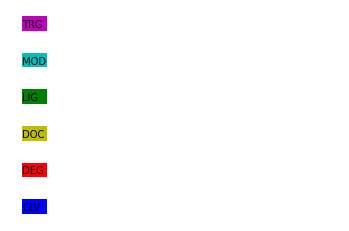

In [99]:
fig,ax = plt.subplots()
plt.axis('off')
ax.plot(5,0)
for k,elm_type in enumerate(color_dict):
    color = color_dict[elm_type]
    ax.add_patch(Rectangle((0,k),0.4,0.4,facecolor=color))
    ax.text(0,k+0.1,elm_type)

In [146]:
filtered_amylos_with_slims = {} # no O43236 ni Q5BIV9
for ID in amylos_with_slims:
    if ID != 'O43236' and ID != 'Q5BIV9':
        filtered_amylos_with_slims[ID] = amylos_with_slims[ID]

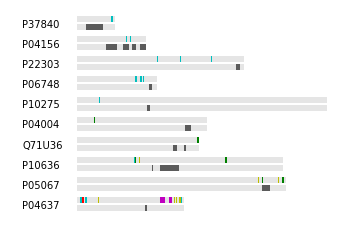

In [153]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig,ax = plt.subplots()
plt.axis('off')
width = 0.3
separation = 0.05
for k,amylo_ID in enumerate(filtered_amylos_with_slims):
    length = len_dict[amylo_ID]
    ax.plot(0,0,alpha = 0)
    ax.text(0,k+0.3,amylo_ID)
    ax.plot(length,k,alpha = 0)
    ax.add_patch(Rectangle((200,k+0.5-width-separation),length,width,facecolor=(0,0,0,0.1)))
    amylo_spans = amylo_spans_dict[amylo_ID]
    if type(amylo_spans) == str:
        amylo_spans = amylo_spans.split(',')
        new_amylo_spans = []
        for amylo_span in amylo_spans:
            amylo_span = amylo_span.split('-')
            new_amylo_spans.append((int(amylo_span[0]),int(amylo_span[1])))
        amylo_spans = new_amylo_spans
        if type(amylo_spans[0][0]) == int:
            amylo_spans = amylo_spans[0]
    for amylo_span in amylo_spans:
        ax.add_patch(Rectangle((200 + amylo_span[0],k+0.5-width-separation),amylo_span[1] - amylo_span[0],width,facecolor=(0,0,0,0.6)))
    
    ax.add_patch(Rectangle((200,k+0.5+separation),length,width,facecolor=(0,0,0,0.1)))
    elm_classes_in_amylo = amylos_with_slims[amylo_ID]
    for elm_class in elm_classes_in_amylo:
        instances_in_amylo = elm_classes_in_amylo[elm_class]
        for slim in instances_in_amylo: #un mismo amylo puede tener mas de una instancia del mismo slim en su secuencia
            slim_span = slim['span']
            ax.add_patch(Rectangle((200 + slim_span[0],k+0.5+separation),slim_span[1] - slim_span[0],width,facecolor=color_dict[elm_class[0:3]]))
            
plt.savefig('../results/test.png',dpi = 300)